In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [8]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
df.shape

(714, 3)

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
X = df.iloc[:, 1 :]
Y = df.iloc[:, 0]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
X_train.head(2)


,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [18]:
clf = DecisionTreeClassifier()

In [19]:
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [20]:
accuracy_score(Y_test, y_pred)

0.6223776223776224

In [21]:
# cross_val_score
np.mean(cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='accuracy'))

0.6260758998435054

In [22]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')


In [23]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [24]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [25]:
trf.named_transformers_['first'].n_bins_

array([15])

In [26]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [27]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf':X_train_trf[:, 1]
})

In [28]:
output['age_labels'] = pd.cut(x=X_train['Age'], 
                             bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], 
                             bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [29]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
465,38.0,11.0,7.0500,0.0,"(35.0, 38.0]","(0.0, 7.25]"
850,4.0,0.0,31.2750,11.0,"(0.42, 6.0]","(26.55, 31.275]"
707,42.0,12.0,26.2875,9.0,"(38.0, 42.0]","(26.0, 26.55]"
535,7.0,1.0,26.2500,9.0,"(6.0, 16.0]","(26.0, 26.55]"
153,40.5,11.0,14.5000,7.0,"(38.0, 42.0]","(14.454, 18.75]"


In [30]:
clf = DecisionTreeClassifier()

In [31]:
clf.fit(X_train_trf, Y_train)
y_pred = clf.predict(X_test_trf)

In [32]:
accuracy_score(Y_test,y_pred)

0.6363636363636364

In [33]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='accuracy'))

0.6358959311424099

In [34]:
def descritize(bins, strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbins_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbins_age, [0]),
        ('second', kbins_fare, [1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:, 0], color='red')
    plt.title('After')

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:, 1], color='red')
    plt.title('After')

    plt.show()
    

0.6275234741784037


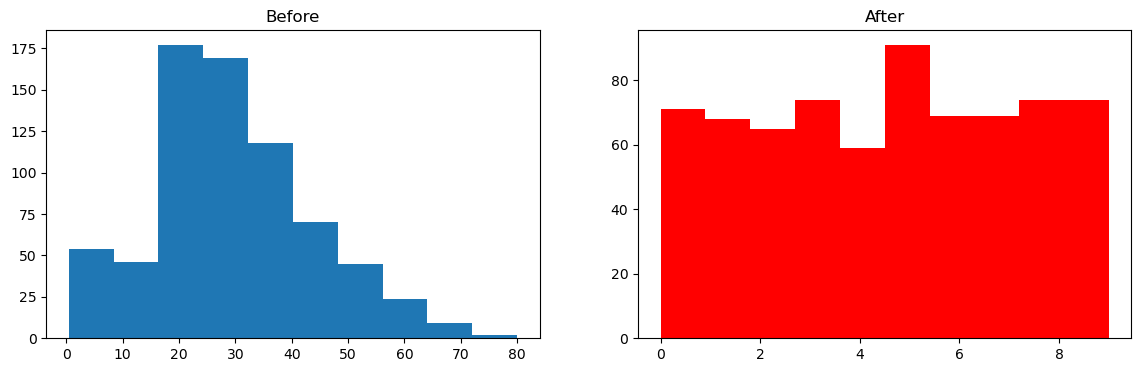

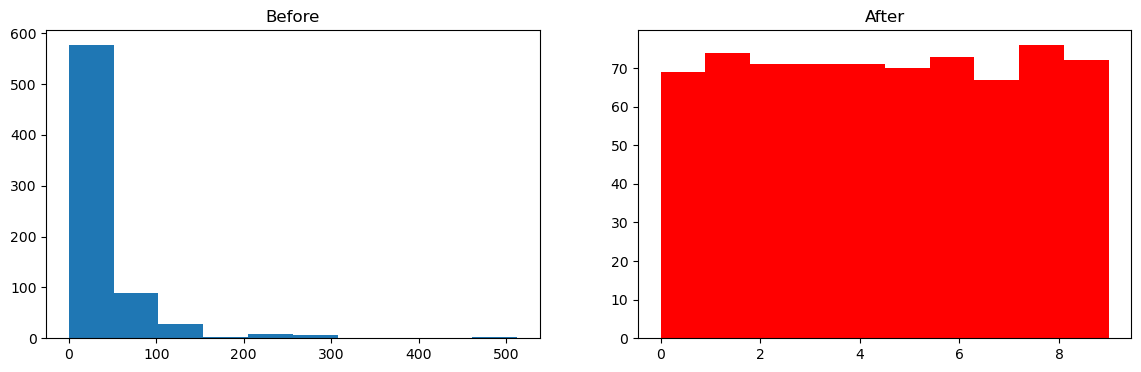

In [35]:
descritize(10, 'quantile')

0.6331181533646322


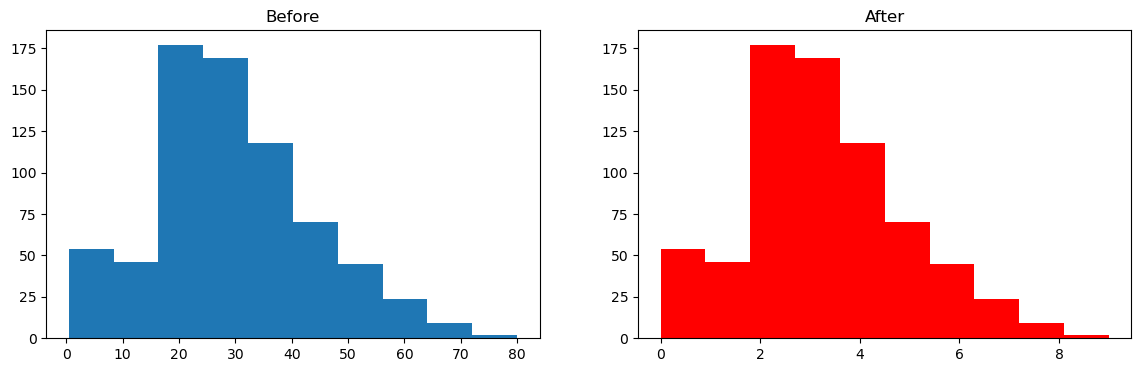

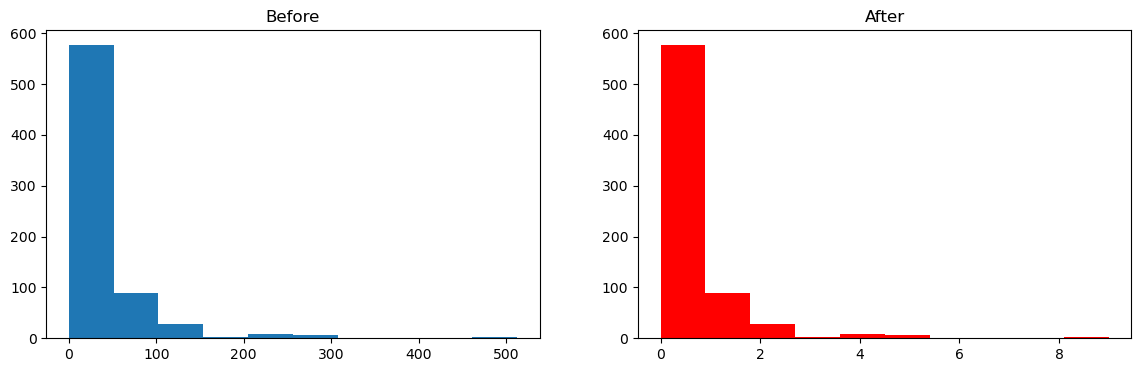

In [36]:
descritize(10, 'uniform')

f:\Anaconda-dd\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "f:\Anaconda-dd\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "f:\Anaconda-dd\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\Anaconda-dd\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "f:\Anaconda-dd\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^

0.6303208137715179


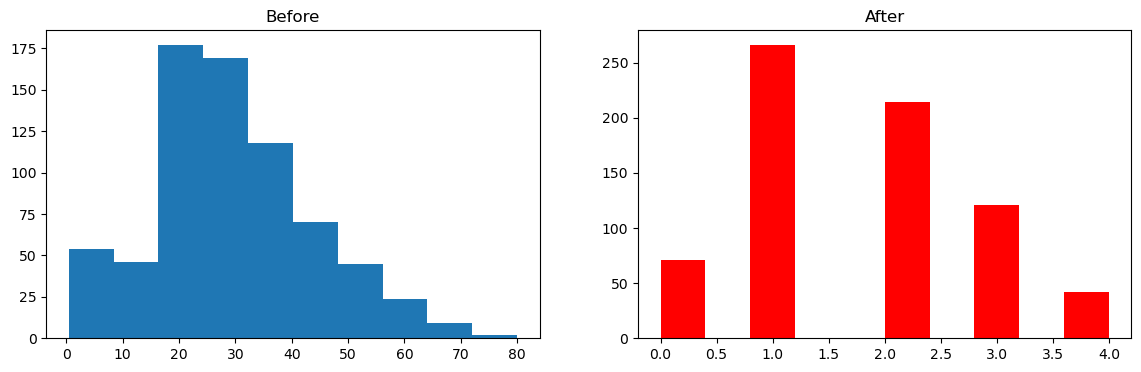

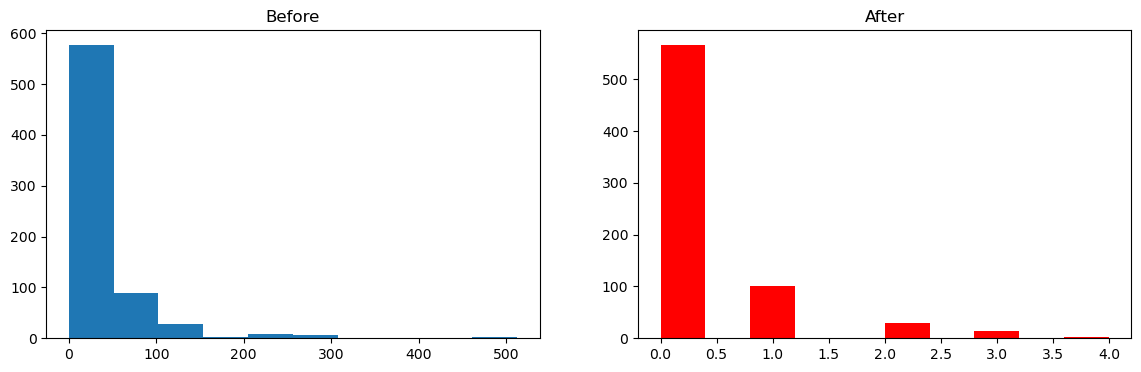

In [37]:
descritize(5, 'kmeans')